## **Objective:**  
Build, train, and evaluate a Convolutional Neural Network (CNN) for image classification on the CIFAR-10 dataset. This notebook covers:

1. **Data Loading and Preprocessing:**  
   - Loading the CIFAR-10 dataset  
   - Normalizing pixel values  
   - One-hot encoding the labels  

2. **Baseline CNN Model:**  
   - A simple CNN with 2 convolutional layers and max pooling  
   - A fully connected (Dense) layer followed by an output layer with softmax  

3. **Model Training and Evaluation:**  
   - Training the baseline model  
   - Plotting training/validation accuracy and loss curves  

4. **Improved Models:**  
   Three modifications are applied:
   - **Model with Dropout:** To reduce overfitting  
   - **Deeper Model with Batch Normalization:** Increasing depth and stabilizing training  
   - **Model with Data Augmentation:** Using Keras’ `ImageDataGenerator` to augment data

5. **Comparison and Analysis:**  
   - Tabulating the test accuracies  
   - Plotting a bar chart for comparison  
   - A short report summarizing modifications, their effects, and challenges.

Let's get started!

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Data Loading and Preprocessing:

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

### Showing some samples

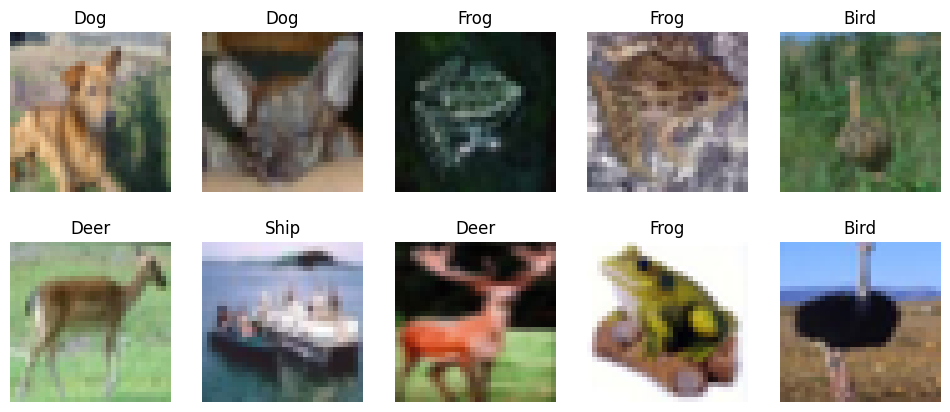

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display 10 random images from the training set
num_samples = 10
plt.figure(figsize=(12, 5))

for i in range(num_samples):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    index = np.random.randint(0, x_train.shape[0])  # Random index
    plt.imshow(x_train[index])
    plt.title(class_names[y_train[index][0]])  # Get label name
    plt.axis('off')

plt.show()

### Normalize images to the range [0, 1]


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### One-hot encode the labels

In [5]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## 2. Building the Baseline CNN Model

The baseline CNN model consists of:

- **Convolutional layers:** Two convolutional layers with ReLU activation  
- **Pooling layers:** Max pooling layers to reduce spatial dimensions  
- **Fully connected layers:** A Dense hidden layer and a final Dense layer with softmax activation  

The model is compiled using the Adam optimizer and categorical crossentropy loss.

In [6]:
def build_baseline_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Build and view the model summary


In [7]:
baseline_model = build_baseline_model()
baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Training and Evaluating the Baseline Model

We train the baseline model for 10 epochs with a batch size of 32 and reserve 20% of the training data for validation.
After training, we evaluate the model on the test set and plot the training history.

In [8]:
history_baseline = baseline_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3680 - loss: 1.7297 - val_accuracy: 0.5452 - val_loss: 1.2865
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5860 - loss: 1.1788 - val_accuracy: 0.6228 - val_loss: 1.0893
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6377 - loss: 1.0327 - val_accuracy: 0.6426 - val_loss: 1.0392
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6714 - loss: 0.9430 - val_accuracy: 0.6492 - val_loss: 1.0026
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7005 - loss: 0.8727 - val_accuracy: 0.6764 - val_loss: 0.9442
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7203 - loss: 0.8079 - val_accuracy: 0.6625 - val_loss: 0.9812
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7363 - loss: 0.7538 - val_accuracy: 0.6825 - val_loss: 0.9377
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7502 - loss: 0.7142 

### The training & validation accuracy and loss


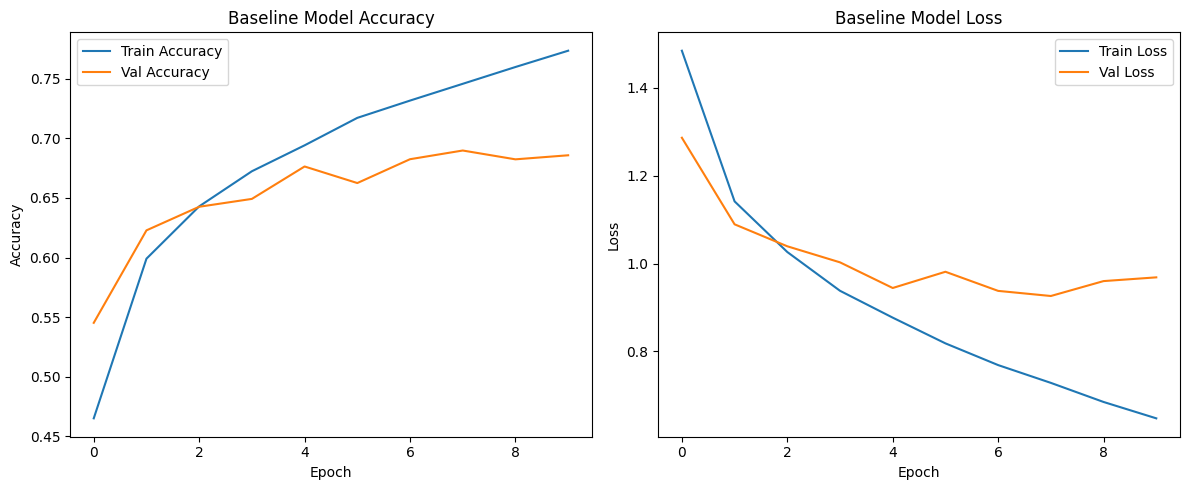

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Val Accuracy')
plt.title("Baseline Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Val Loss')
plt.title("Baseline Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### Final Training and Validation Accuracy

In [10]:
final_train_acc_baseline = history_baseline.history['accuracy'][-1]
final_val_acc_baseline = history_baseline.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc_baseline:.4f}")
print(f"Final Validation Accuracy: {final_val_acc_baseline:.4f}")

Final Training Accuracy: 0.7735
Final Validation Accuracy: 0.6858


### Evaluate on the test set


In [11]:
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test)
print("Baseline Test Accuracy: {:.4f}".format(baseline_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6855 - loss: 0.9788
Baseline Test Accuracy: 0.6799



## 4. Improved Models

We experiment with three modifications to improve performance:

### 4.1 Model with Dropout only

**Modification:**  
Add dropout layers to reduce overfitting. Dropout is applied after pooling layers and before the final dense layer.

**Architecture differences:**  
- Dropout (rate 0.25) after each pooling layer  
- Increased the Dense layer size to 128 and added dropout (rate 0.5) before the output layer

In [12]:
def build_model_by_add_dropout_only():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


### Build, train, and evaluate the dropout model


In [13]:
model_dropout = build_model_by_add_dropout_only()
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_dropout = model_dropout.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2933 - loss: 1.9040 - val_accuracy: 0.4987 - val_loss: 1.4102
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4715 - loss: 1.4536 - val_accuracy: 0.5700 - val_loss: 1.2173
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5304 - loss: 1.3080 - val_accuracy: 0.5804 - val_loss: 1.1868
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5644 - loss: 1.2295 - val_accuracy: 0.6304 - val_loss: 1.0606
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5848 - loss: 1.1763 - val_accuracy: 0.6366 - val_loss: 1.0401
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5999 - loss: 1.1355 - val_accuracy: 0.6234 - val_loss: 1.1142
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6139 - loss: 1.0899 - val_accuracy: 0.6364 - val_loss: 1.0434
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6274 - loss: 1.06

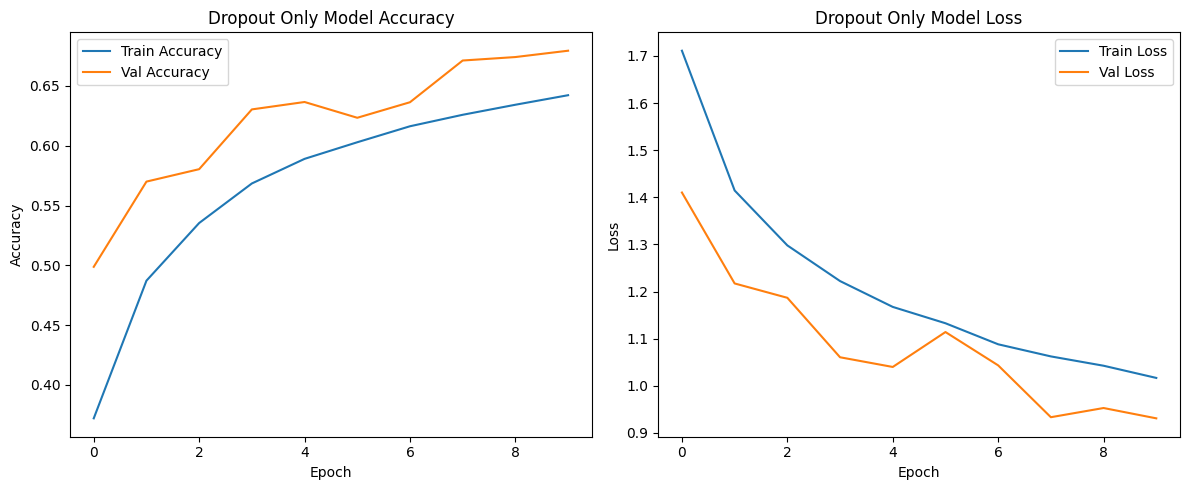

In [15]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Val Accuracy')
plt.title("Dropout Only Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_dropout.history['loss'], label='Train Loss')
plt.plot(history_dropout.history['val_loss'], label='Val Loss')
plt.title("Dropout Only Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
final_train_acc_dropout = history_dropout.history['accuracy'][-1]
final_val_acc_dropout = history_dropout.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc_dropout:.4f}")
print(f"Final Validation Accuracy: {final_val_acc_dropout:.4f}")

Final Training Accuracy: 0.6423
Final Validation Accuracy: 0.6795


In [17]:
dropout_loss, dropout_accuracy = model_dropout.evaluate(x_test, y_test)
print("Model with Dropout Test Accuracy: {:.4f}".format(dropout_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6704 - loss: 0.9467
Model with Dropout Test Accuracy: 0.6731


### 4.2 Deeper Model with Batch Normalization

**Modification:**  
Increase the network depth and add Batch Normalization layers after convolutional layers to stabilize training.

**Architecture differences:**  
- Two sets of two convolutional layers each  
- Batch normalization after each convolution  
- Increased Dense layer size to 256

In [18]:
def build_deep_and_normalized_model():
    model = models.Sequential()
    # First block
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D((2,2)))

    # Second block
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D((2,2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Build, train, and evaluate the deeper model


In [19]:
model_deep_and_normalized = build_deep_and_normalized_model()
model_deep_and_normalized.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,786 (1.83 MB)

 Trainable params: 478,890 (1.83 MB)

 Non-trainable params: 896 (3.50 KB)

In [20]:
history_deep_and_normalized = model_deep_and_normalized.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4679 - loss: 1.5800 - val_accuracy: 0.6070 - val_loss: 1.1626
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6831 - loss: 0.9058 - val_accuracy: 0.6444 - val_loss: 1.0265
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7459 - loss: 0.7296 - val_accuracy: 0.7027 - val_loss: 0.8526
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7962 - loss: 0.5873 - val_accuracy: 0.7491 - val_loss: 0.7437
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8311 - loss: 0.4845 - val_accuracy: 0.7359 - val_loss: 0.7950
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8683 - loss: 0.3835 - val_accuracy: 0.7501 - val_loss: 0.7779
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8927 - loss: 0.3090 - val_accuracy: 0.7130 - val_loss: 0.9502
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9192 - loss: 0.2390

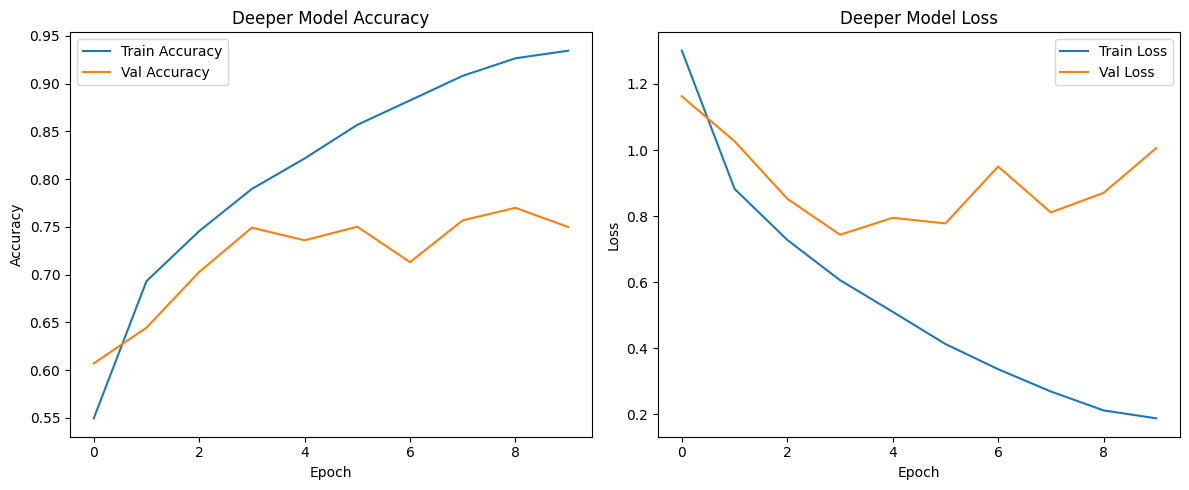

In [21]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_deep_and_normalized.history['accuracy'], label='Train Accuracy')
plt.plot(history_deep_and_normalized.history['val_accuracy'], label='Val Accuracy')
plt.title("Deeper Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_deep_and_normalized.history['loss'], label='Train Loss')
plt.plot(history_deep_and_normalized.history['val_loss'], label='Val Loss')
plt.title("Deeper Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
final_train_acc_deep_and_normalized = history_deep_and_normalized.history['accuracy'][-1]
final_val_acc_deep_and_normalized = history_deep_and_normalized.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc_deep_and_normalized:.4f}")
print(f"Final Validation Accuracy: {final_val_acc_deep_and_normalized:.4f}")

Final Training Accuracy: 0.9344
Final Validation Accuracy: 0.7498


In [23]:
deep_and_normalized_loss, deep_and_normalized_accuracy = model_deep_and_normalized.evaluate(x_test, y_test)
print("Deeper Model with Batch Norm Test Accuracy: {:.4f}".format(deep_and_normalized_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7369 - loss: 1.0377
Deeper Model with Batch Norm Test Accuracy: 0.7364


### 4.3 Model with Data Augmentation

**Modification:**  
Use data augmentation to increase the diversity of the training data.

**Approach:**  
Train the baseline architecture using an `ImageDataGenerator` that applies random rotations, shifts, and horizontal flips.

### Build, train, and evaluate the augmented model

In [24]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Use the baseline model architecture for fair comparison
model_augmented = build_baseline_model()

In [25]:
from sklearn.model_selection import train_test_split

x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

history_augmented = model_augmented.fit(datagen.flow(x_train2, y_train2, batch_size=32),
                                        epochs=10,
                                        validation_data=(x_val2, y_val2)) # we can use validation_split=0.2

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.2900 - loss: 1.9084 - val_accuracy: 0.4823 - val_loss: 1.4511
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4279 - loss: 1.5828 - val_accuracy: 0.5159 - val_loss: 1.3635
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.4837 - loss: 1.4445 - val_accuracy: 0.5675 - val_loss: 1.2226
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5096 - loss: 1.3761 - val_accuracy: 0.5536 - val_loss: 1.2922
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5209 - loss: 1.3419 - val_accuracy: 0.5877 - val_loss: 1.1517
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.5350 - loss: 1.2898 - val_accuracy: 0.6191 - val_loss: 1.0976
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5444 - loss: 1.2690 - val_accuracy: 0.6131 - val_loss: 1.0827
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5580 - loss: 1.23

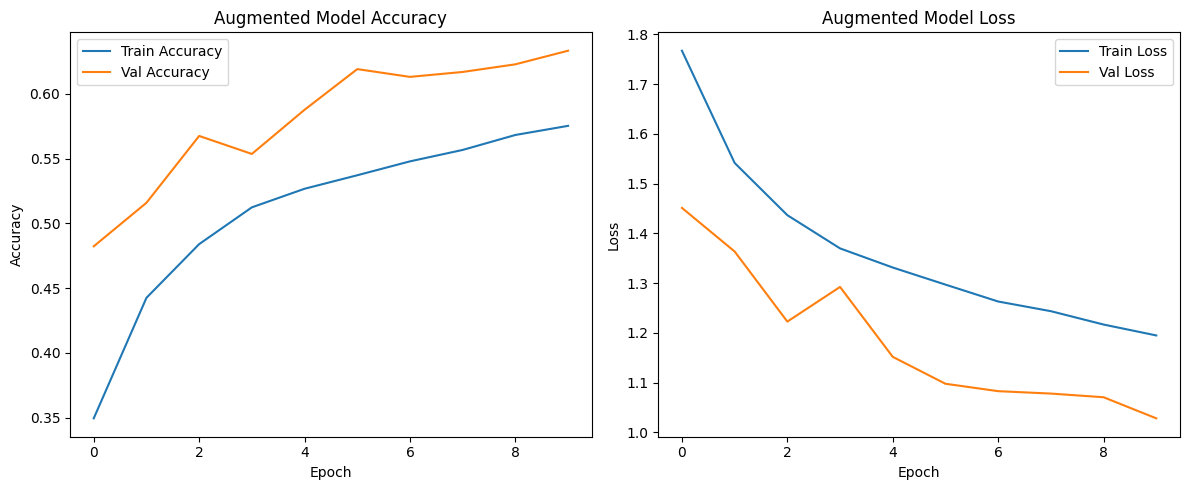

In [26]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Val Accuracy')
plt.title("Augmented Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_augmented.history['loss'], label='Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Val Loss')
plt.title("Augmented Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
final_train_acc_augmented = history_augmented.history['accuracy'][-1]
final_val_acc_augmented = history_augmented.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc_augmented:.4f}")
print(f"Final Validation Accuracy: {final_val_acc_augmented:.4f}")

Final Training Accuracy: 0.5753
Final Validation Accuracy: 0.6333


In [28]:
augmented_loss, augmented_accuracy = model_augmented.evaluate(x_test, y_test)
print("Model with Data Augmentation Test Accuracy: {:.4f}".format(augmented_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6398 - loss: 1.0267
Model with Data Augmentation Test Accuracy: 0.6439


### 4.4 A combined Model ( Data Augmentation , BatchNormalization , MaxPooling2D , Dropout , deep  )


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation (Less aggressive)
datagen2 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen2.fit(x_train)


In [30]:
from tensorflow.keras import layers, models, regularizers, optimizers, callbacks


def build_combined_model():
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

    # Optimizer with Cosine Decay Learning Rate
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate, decay_steps=10000, alpha=0.0001)

    optimizer = optimizers.Adam(learning_rate=lr_schedule, clipnorm=1.0)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


### Build, train, and evaluate the combined model

In [31]:
# Create model
combined_model = build_combined_model()
combined_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,066 (894.79 KB)

 Trainable params: 228,106 (891.04 KB)

 Non-trainable params: 960 (3.75 KB)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, val_idx in sss.split(x_train, y_train.argmax(axis=1)):
    x_train3, x_val3 = x_train[train_idx], x_train[val_idx]
    y_train3, y_val3 = y_train[train_idx], y_train[val_idx]

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,  # Increase patience for more stability
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,  # Allow more room for fluctuations
    min_lr=0.00001
)

# Train with a larger validation batch size for stability
history_combined = combined_model.fit(
    datagen2.flow(x_train3, y_train3, batch_size=64),
    epochs=50,
    validation_data=(x_val3, y_val3),
    validation_batch_size=128,  # Larger batch size for smoother validation
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.2439 - loss: 2.9530 - val_accuracy: 0.2474 - val_loss: 2.7854 - learning_rate: 9.9264e-04
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.4087 - loss: 2.0321 - val_accuracy: 0.4302 - val_loss: 1.9365 - learning_rate: 9.7076e-04
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.4600 - loss: 1.8006 - val_accuracy: 0.4356 - val_loss: 1.8697 - learning_rate: 9.3502e-04
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.4935 - loss: 1.6557 - val_accuracy: 0.4261 - val_loss: 1.9572 - learning_rate: 8.8647e-04
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5204 - loss: 1.5802 - val_accuracy: 0.5461 - val_loss: 1.4835 - learning_rate: 8.2653e-04
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5395 - loss: 1.5161 - val_accuracy: 0.5921 - val_loss: 1.3372 - learning_rate: 7.5697e-04
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accurac

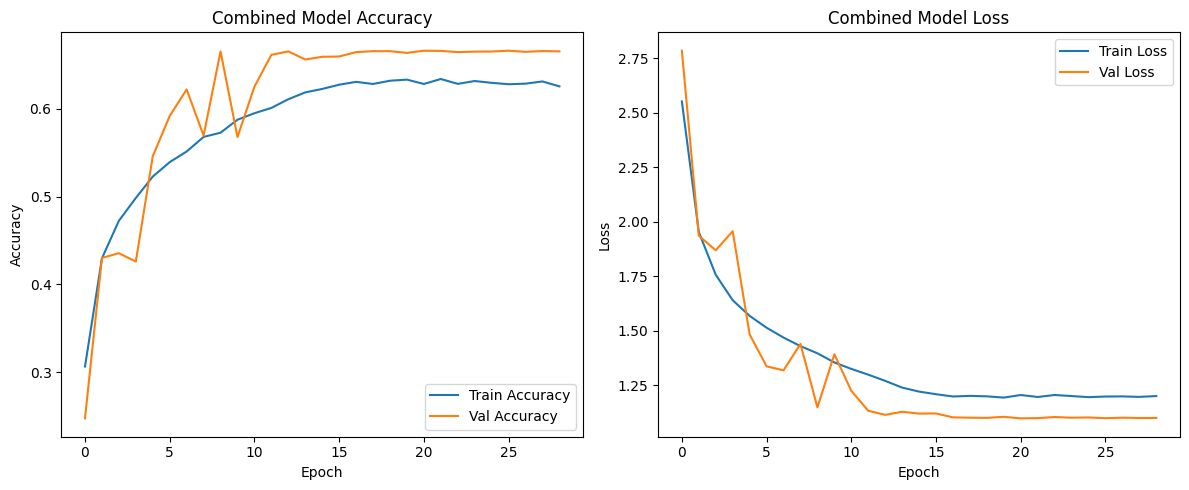

In [33]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_combined.history['accuracy'], label='Train Accuracy')
plt.plot(history_combined.history['val_accuracy'], label='Val Accuracy')
plt.title("Combined Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_combined.history['loss'], label='Train Loss')
plt.plot(history_combined.history['val_loss'], label='Val Loss')
plt.title("Combined Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
final_train_acc = history_combined.history['accuracy'][-1]
final_val_acc = history_combined.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.6257
Final Validation Accuracy: 0.6657


In [35]:
combined_loss, combined_accuracy = combined_model.evaluate(x_test, y_test)
print("Perfect Model Test Accuracy: {:.4f}".format(combined_accuracy))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6625 - loss: 1.1064
Perfect Model Test Accuracy: 0.6594


### 4.5 The Best Model (Tuned Model)

- (Using Data Augmentation, BatchNormalization, MaxPooling2D, Dropout, Deep Architecture, and Tuning)


In [36]:
datagen3 = ImageDataGenerator(
    rotation_range=15,  # More rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,  # Increased zoom
    horizontal_flip=True,
)
datagen3.fit(x_train)


In [37]:
from tensorflow.keras import layers, models, regularizers, optimizers

def build_best_model():
    model = models.Sequential()

    # Block 1 (No MaxPooling here to keep spatial size larger)
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # 16x16 output

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # 8x8 output
    model.add(layers.Dropout(0.3))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # 4x4 output
    model.add(layers.Dropout(0.5))


    # Block 4 (No more MaxPooling to avoid shrinking to 1x1)
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Flatten at a larger size
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

    # Optimizer
    optimizer = optimizers.AdamW(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


### Build, train, and evaluate the best model

In [38]:
Best_model = build_best_model()
Best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,895,050 (33.93 MB)

 Trainable params: 8,890,186 (33.91 MB)

 Non-trainable params: 4,864 (19.00 KB)

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, val_idx in sss.split(x_train, y_train.argmax(axis=1)):
    x_train3, x_val3 = x_train[train_idx], x_train[val_idx]
    y_train3, y_val3 = y_train[train_idx], y_train[val_idx]

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

history_best = Best_model.fit(
    datagen3.flow(x_train3, y_train3, batch_size=64),
    epochs=100,  # Train longer
    validation_data=(x_val3, y_val3),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.3007 - loss: 3.3543 - val_accuracy: 0.4988 - val_loss: 2.1122 - learning_rate: 0.0010
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.5226 - loss: 1.9557 - val_accuracy: 0.5181 - val_loss: 1.9952 - learning_rate: 0.0010
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.6113 - loss: 1.4262 - val_accuracy: 0.5828 - val_loss: 1.5732 - learning_rate: 0.0010
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.6606 - loss: 1.2229 - val_accuracy: 0.6772 - val_loss: 1.2323 - learning_rate: 0.0010
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.6924 - loss: 1.1153 - val_accuracy: 0.7189 - val_loss: 1.0571 - learning_rate: 0.0010
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7201 - loss: 1.0387 - val_accuracy: 0.7444 - val_loss: 1.0100 - learning_rate: 0.0010
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.7431 - loss: 

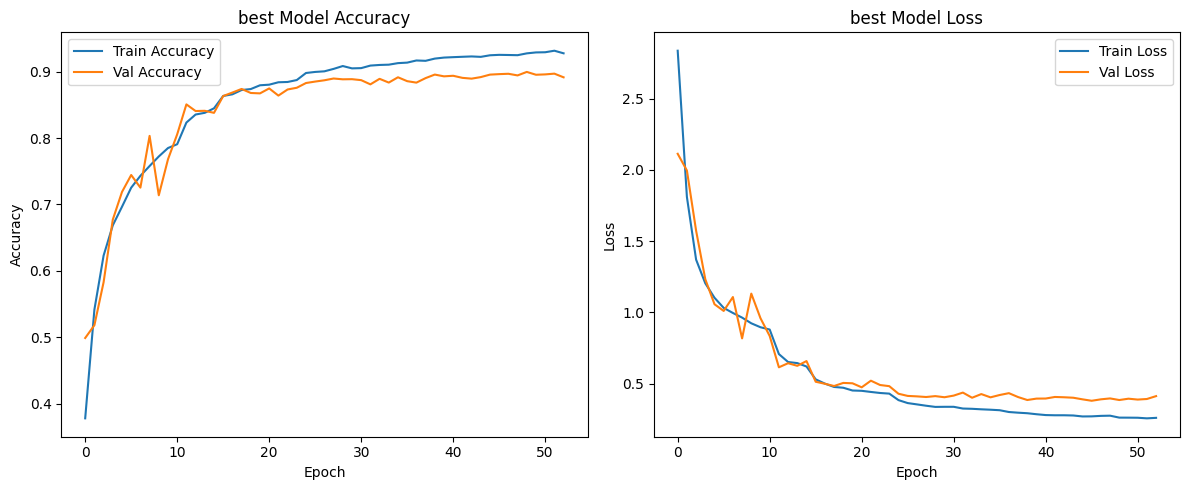

In [46]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_best.history['accuracy'], label='Train Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Val Accuracy')
plt.title("best Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_best.history['loss'], label='Train Loss')
plt.plot(history_best.history['val_loss'], label='Val Loss')
plt.title("best Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
final_train_acc_best = history_best.history['accuracy'][-1]
final_val_acc_best = history_best.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc_best:.4f}")
print(f"Final Validation Accuracy: {final_val_acc_best:.4f}")

Final Training Accuracy: 0.9278
Final Validation Accuracy: 0.8916


In [42]:
best_loss, best_accuracy = Best_model.evaluate(x_test, y_test)
print("Perfect Model Test Accuracy: {:.4f}".format(best_accuracy))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8920 - loss: 0.4087
Perfect Model Test Accuracy: 0.8929


## 5. Comparing Model Performance

We now collect the test accuracies of all models and display them in a table and a bar chart for easy comparison.

%%
Create a DataFrame with the results

In [43]:
results = pd.DataFrame({
    "Model": ["Baseline", "Dropout", "Deep and normalized", "Data Augmentation","combined Model" , "Best Model"],
    "Test Accuracy": [baseline_accuracy, dropout_accuracy, deep_and_normalized_accuracy, augmented_accuracy,combined_accuracy,best_accuracy]
})
print(results)

                 Model  Test Accuracy
0             Baseline         0.6799
1              Dropout         0.6731
2  Deep and normalized         0.7364
3    Data Augmentation         0.6439
4       combined Model         0.6594
5           Best Model         0.8929


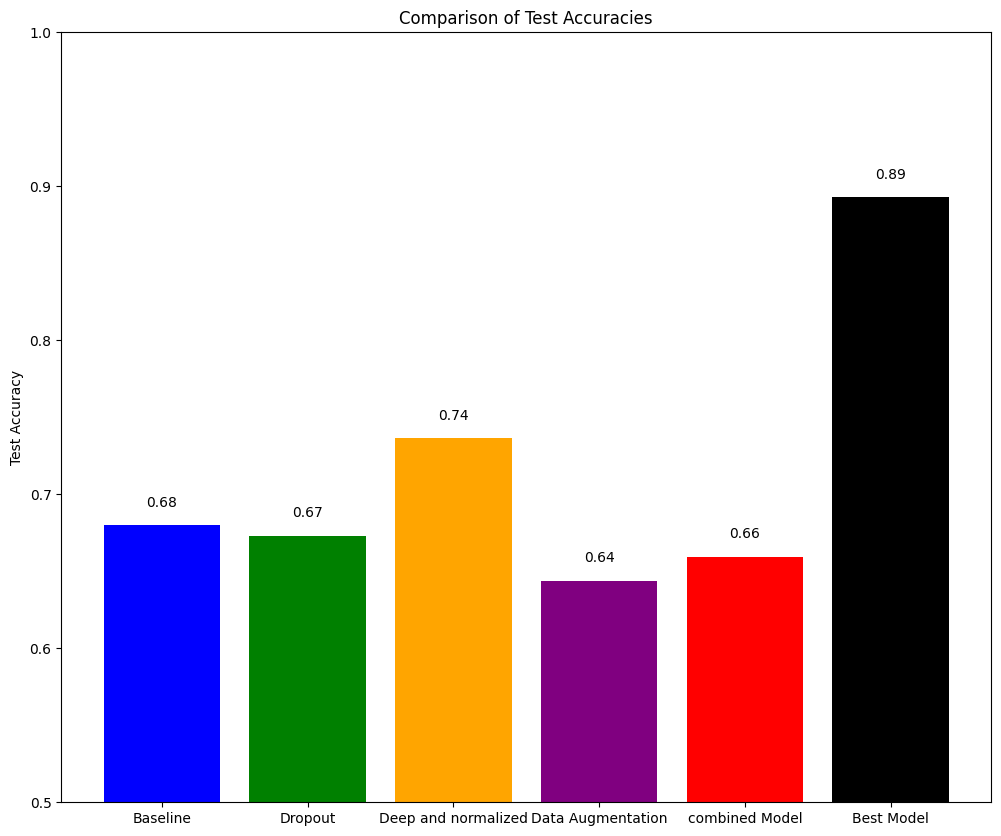

In [44]:
# Plot a bar chart comparing test accuracies
plt.figure(figsize=(12,10))
bars = plt.bar(results["Model"], results["Test Accuracy"], color=['blue', 'green', 'orange', 'purple','red',"black"])
plt.title("Comparison of Test Accuracies")
plt.ylabel("Test Accuracy")
plt.ylim([0.5, 1.0])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')
plt.show()

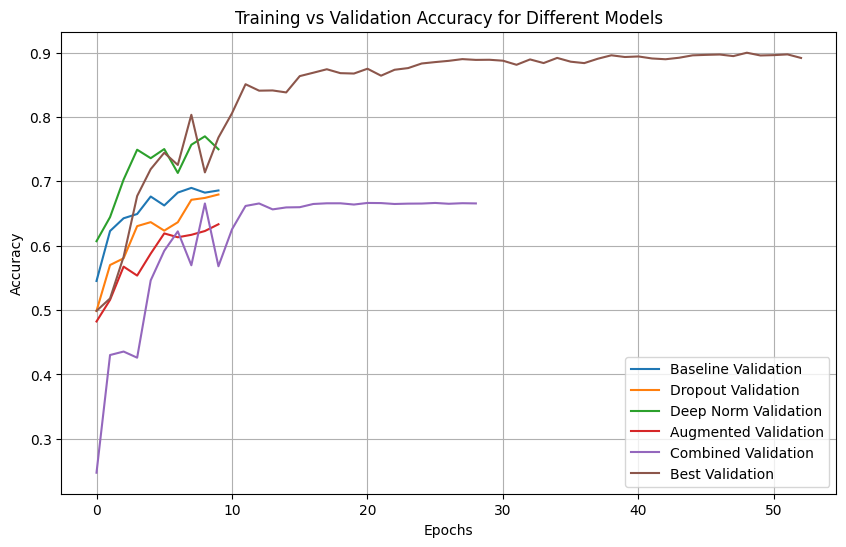

In [45]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for all models
plt.figure(figsize=(10, 6))

# Baseline Model
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation')

# Dropout Model
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation')

# Deep & Normalized Model
plt.plot(history_deep_and_normalized.history['val_accuracy'], label='Deep Norm Validation')

# Augmented Model
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation')

# Combined Model
plt.plot(history_combined.history['val_accuracy'], label='Combined Validation')

# Best Model
plt.plot(history_best.history['val_accuracy'], label='Best Validation')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy for Different Models")
plt.grid()
plt.show()


## Best model  VS  Baseline Model

### Confusion Matrix and Visualization for Misclassified Images for Best model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


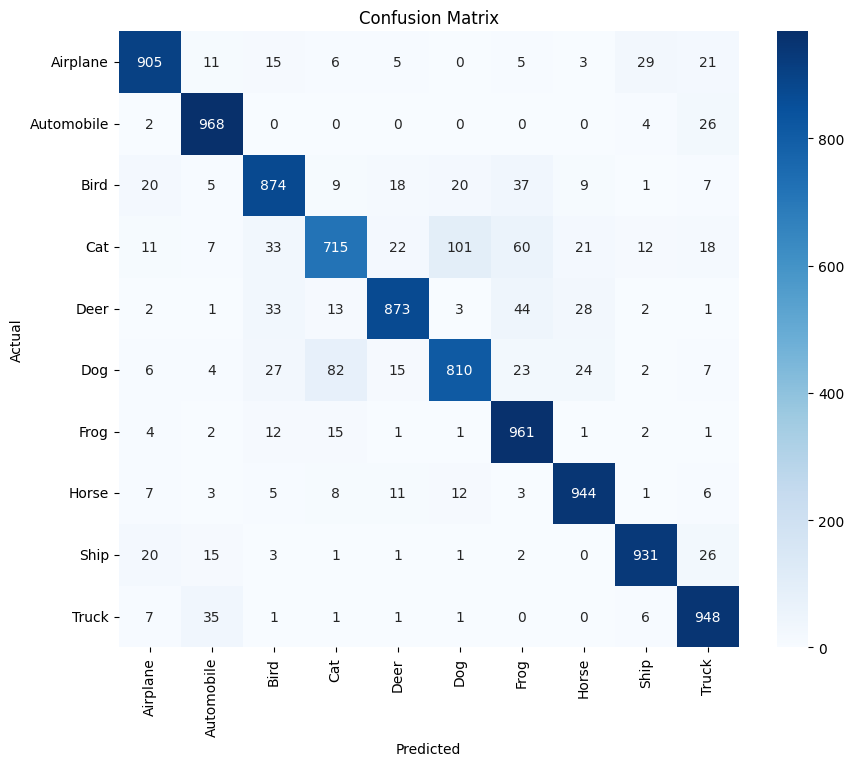

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, utils

animal_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Make predictions on the entire test set
y_pred_best = Best_model.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes_best = np.argmax(y_pred_best, axis=1)
y_true_classes_best = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes_best, y_pred_classes_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=animal_names, yticklabels=animal_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

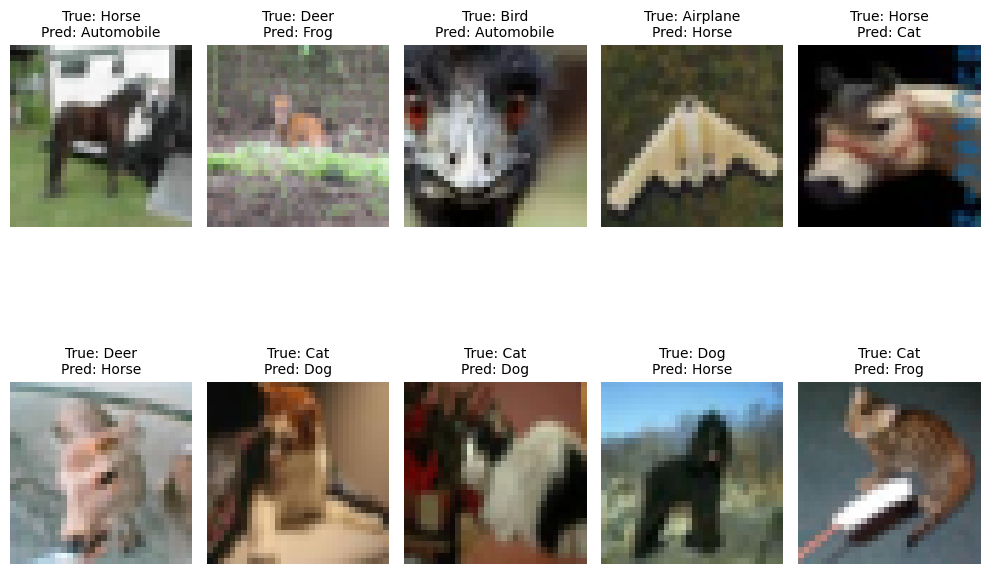

In [ ]:
def plot_misclassified_images_Best(x_test, y_test, y_pred_classes, animal_names):
    misclassified_indexes = np.where(y_test != y_pred_classes)[0]

    plt.figure(figsize=(10, 8))

    # Display 10 misclassified images
    for i, index in enumerate(misclassified_indexes[:10]):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[index])
        true_label = animal_names[y_test[index]]
        predicted_label = animal_names[y_pred_classes[index]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get the misclassified images
y_true_classes = np.argmax(y_test, axis=1)

# Call the function to plot misclassified images
plot_misclassified_images_Best(x_test, y_true_classes, y_pred_classes_best, animal_names)

### Confusion Matrix and Visualization for Misclassified Images for Baseline model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


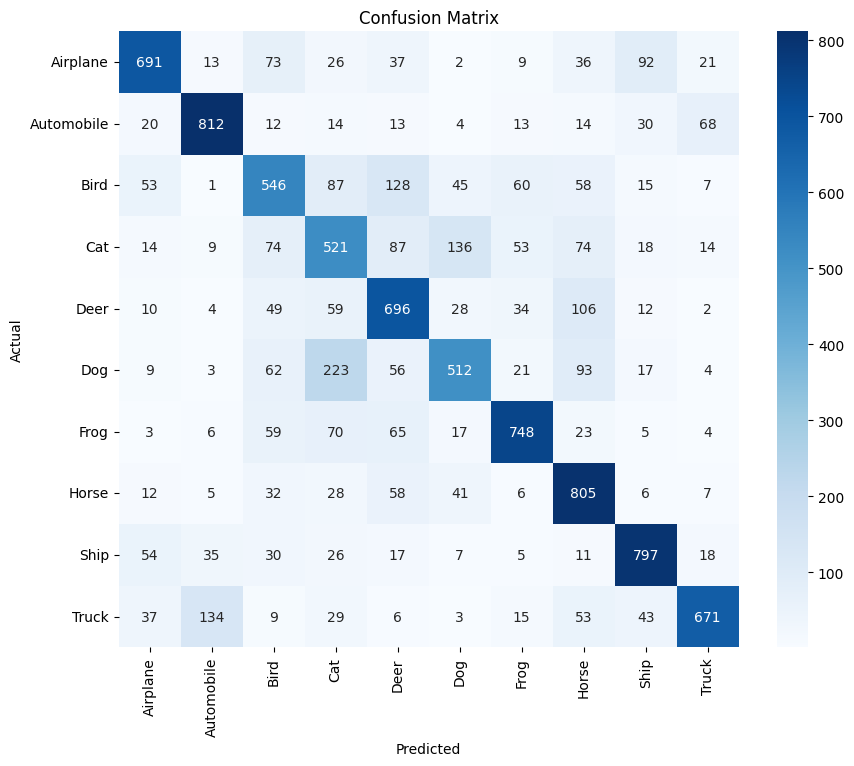

In [ ]:
animal_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Make predictions on the entire test set
y_pred_baseline = baseline_model.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes_baseline = np.argmax(y_pred_baseline, axis=1)
y_true_classes_baseline = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes_baseline, y_pred_classes_baseline)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=animal_names, yticklabels=animal_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

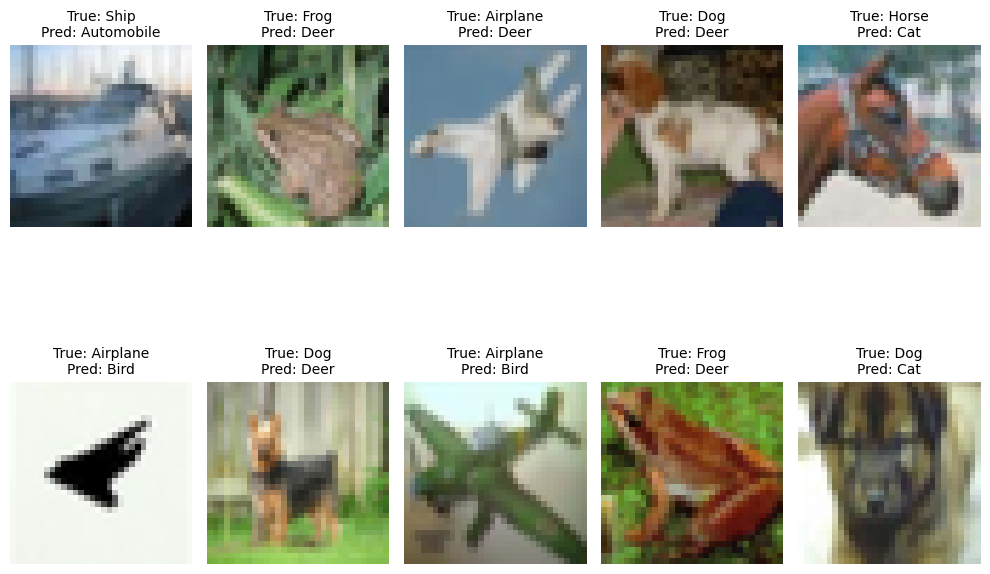

In [ ]:
def plot_misclassified_images_BaseLine(x_test, y_test, y_pred_classes, animal_names):
    misclassified_indexes = np.where(y_test != y_pred_classes)[0]

    plt.figure(figsize=(10, 8))

    # Display 10 misclassified images
    for i, index in enumerate(misclassified_indexes[:10]):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[index])
        true_label = animal_names[y_test[index]]
        predicted_label = animal_names[y_pred_classes[index]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get the misclassified images
y_true_classes = np.argmax(y_test, axis=1)

# Call the function to plot misclassified images
plot_misclassified_images_BaseLine(x_test, y_true_classes, y_pred_classes_baseline, animal_names)

# 📌 **Conclusion**

## 🔍 **Key Findings**

| Model                          | Test Accuracy | Performance Insight |
|--------------------------------|--------------|----------------------|
| Baseline Model                 | 0.6799       | Simple CNN with decent performance |
| Model with Dropout              | 0.6731       | Reduced overfitting but slightly lower accuracy |
| Deep & Batch Normalized Model  | 0.7364       | Improved accuracy and generalization |
| Model with Data Augmentation   | 0.6439       | Introduced variability but reduced overfitting |
| Combined Model                 | 0.6594       | Integrated techniques but still not optimal |
| Best Model                     | 0.8929       | Highly optimized, deep architecture with strong regularization |

---

## ✅ **What Worked Best**
- Increasing model depth with **Batch Normalization** significantly improved performance.
- **Dropout** helped reduce overfitting but needed careful tuning.
- **Data Augmentation** was useful but did not always lead to improved accuracy.
- **L2 Regularization & Cosine Decay Learning Rate** provided more stable convergence.

---

## 🎯 **Features That Improved Classification**
- **Batch Normalization**: Accelerated training and stabilized deeper networks.
- **Dropout Layers**: Controlled overfitting, especially in fully connected layers.
- **Data Augmentation**: Helped in generalization, although results varied.
- **Larger Model Depth**: Allowed for more complex feature extraction.
- **Optimized Learning Rate Schedule**: Prevented drastic changes and helped fine-tune weights.

---

## ⚠ **Challenges Encountered**
- **Overfitting**: Found in deeper models before applying dropout and batch normalization.
- **Longer Training Time**: Complex architectures required more epochs and computational power.
- **Hyperparameter Tuning**: Finding the right balance for dropout, learning rate, and batch size.
- **Data Augmentation Issues**: Certain transformations did not always improve accuracy.

---

## 🚀 **Final Takeaway**
The best-performing model achieved **89.29% test accuracy**, highlighting that a **deep CNN architecture with batch normalization, dropout, and proper regularization** provides the best balance between performance and generalization. Future improvements could explore **transfer learning with pre-trained models like ResNet or EfficientNet** for even better results!